In [ ]:
!pip install vnstock

In [ ]:
from vnstock import * #VN-index

In [15]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# URL of the historical data page
url = 'https://www.cophieu68.vn/quote/history.php?id=fpt'

# Send a GET request to the webpage
response = requests.get(url)
response.raise_for_status()  # Raise an error if the request failed

# Parse the page content
soup = BeautifulSoup(response.content, 'html.parser')

# Find all tables on the page
tables = soup.find_all('table')

# Assuming the table with the data is the first table
table = tables[0]

# Use pandas to read the HTML table into a DataFrame
df = pd.read_html(str(table))[0]

# Save the DataFrame to a CSV file
df.to_csv('fpt_historical_data.csv', index=False)

print("Data saved to fpt_historical_data.csv")


Data saved to fpt_historical_data.csv


In [16]:
# Load the data from the CSV file
df = pd.read_csv("/content/fpt_historical_data.csv")

# Display the first few rows of the DataFrame
print(df.head())

                      0                 1           2          3  \
0             Thời gian  +/- Thay đổi giá  % Thay đổi  Tổng KLGD   
1  1 tháng (2024-04-22)             22.70      20.58%   62445300   
2  2 tháng (2024-03-21)             16.80      14.46%  113241700   
3  3 tháng (2024-02-20)             28.70      27.52%  190325600   
4  6 tháng (2023-11-22)                40      43.01%  303742900   

                  4                  5                  6  
0  KL NĐTNN Mua-Bán  GT NĐTNN (Tỉ VND)          TN/Giá/CN  
1           -765954             -157.1  110.30 135.40 133  
2           -804854             -161.5     109 135.40 133  
3           -823932             -163.6  103.90 135.40 133  
4          -1063121             -189.9   90.70 135.40 133  


In [17]:
print(df.columns)

Index(['0', '1', '2', '3', '4', '5', '6'], dtype='object')


<ipython-input-26-5b9258b2f38a>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("/content/fpt_historical_data.csv", header=None, parse_dates=[0])


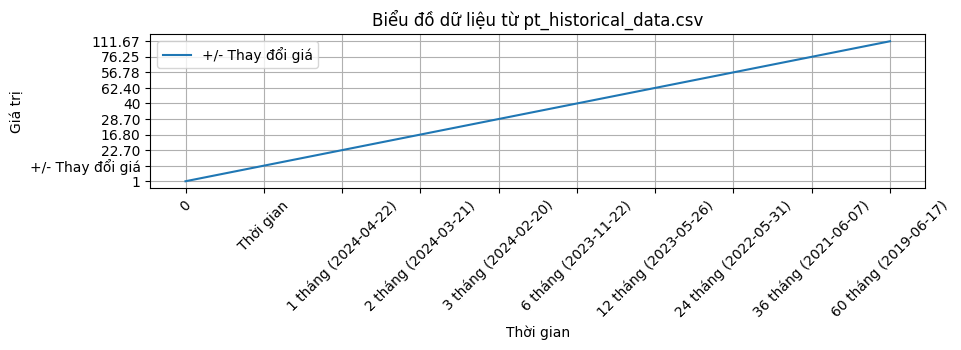

In [26]:
# Load the data from the CSV file with no header row and parse the first column as datetime
df = pd.read_csv("/content/fpt_historical_data.csv", header=None, parse_dates=[0])

# Plot the data
plt.figure(figsize=(10, 2))

plt.plot(df[0], df[1], label='+/- Thay đổi giá')

plt.xlabel('Thời gian')
plt.ylabel('Giá trị')
plt.title('Biểu đồ dữ liệu từ pt_historical_data.csv')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
